<a href="https://colab.research.google.com/github/Nilanjan1210/PyTorch-Fundamentals/blob/main/05_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

# Linear Regression Implementation from Scratch

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
# Generateing the dataset
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2.3, -1.2])
true_b = torch.tensor(2.5)
features, labels = synthetic_data(true_w, true_b, 1000)
print(f'features: {features[0]}, \nlabel: {labels[0]}')

features: tensor([-0.6649, -1.5536]), 
label: tensor([2.8344])


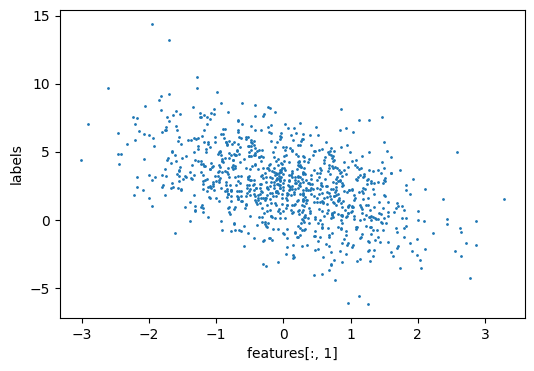

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(features[:, 1], labels, 1)
plt.xlabel('features[:, 1]')
plt.ylabel('labels')
plt.show()

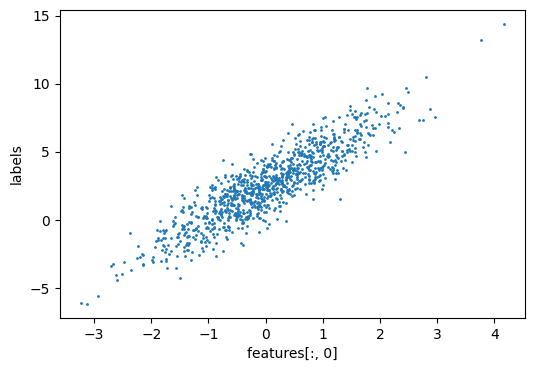

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(features[:, 0], labels, 1)
plt.xlabel('features[:, 0]')
plt.ylabel('labels')
plt.show()

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    np.random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9728,  0.9264],
        [-0.5932, -0.2768],
        [ 0.9906, -0.1596],
        [-0.6649, -1.5536],
        [-0.0759, -0.4843],
        [ 0.9667, -1.2041],
        [-0.9449,  0.8651],
        [ 0.1379,  0.6524],
        [ 1.4226, -1.6468],
        [-2.1950,  0.1572]]) 
 tensor([[-0.8574],
        [ 1.4492],
        [ 4.9689],
        [ 2.8344],
        [ 2.8986],
        [ 6.1702],
        [-0.6992],
        [ 2.0345],
        [ 7.7338],
        [-2.7475]])


In [8]:
# Initializing Model Parameters
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(f"w: {w}, \nb: {b}")

w: tensor([[0.0135],
        [0.0015]], requires_grad=True), 
b: tensor([0.], requires_grad=True)


In [9]:
# Defining the Model
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [10]:
# Defining the Loss function
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
# Defining the Optimization Algorithm
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
#  Traing
lr = 0.01
nun_epochs = 10
model = linreg
loss = squared_loss

for epoch in range(nun_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(model(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(model(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.822881
epoch 2, loss 0.100956
epoch 3, loss 0.012502
epoch 4, loss 0.001589
epoch 5, loss 0.000241
epoch 6, loss 0.000071
epoch 7, loss 0.000050
epoch 8, loss 0.000047
epoch 9, loss 0.000047
epoch 10, loss 0.000047


In [13]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0001, 0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([-5.1498e-05], grad_fn=<SubBackward0>)


#Concise Implementation of Linear Regression

In [14]:
true_w = torch.tensor([2.3, -1.2])
true_b = torch.tensor(2.5)
features, labels = synthetic_data(true_w, true_b, 1000)
print(f'features: {features[0]}, \nlabel: {labels[0]}')

features: tensor([1.5749, 0.5758]), 
label: tensor([5.4248])


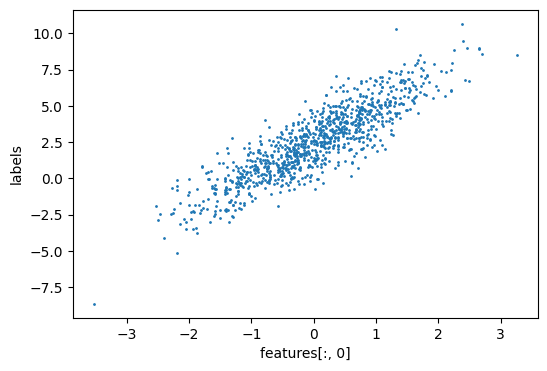

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(features[:, 0], labels, 1)
plt.xlabel('features[:, 0]')
plt.ylabel('labels')
plt.show()

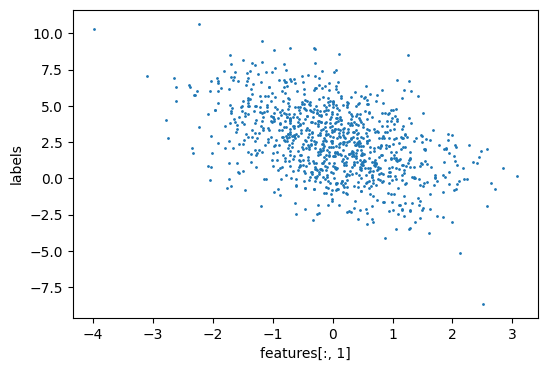

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(features[:, 1], labels, 1)
plt.xlabel('features[:, 1]')
plt.ylabel('labels')
plt.show()

In [17]:
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [18]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [19]:
next(iter(data_iter))

[tensor([[ 0.1180, -0.2041],
         [ 1.1889, -0.4724],
         [-2.1532,  0.5810],
         [-0.5700,  0.4793],
         [-0.3423, -0.8101],
         [-0.1293,  0.4773],
         [ 0.0153,  0.9828],
         [-0.0375, -0.1652],
         [-0.7099, -0.1592],
         [ 0.0237, -0.3891]]),
 tensor([[ 2.9976],
         [ 5.7981],
         [-3.1523],
         [ 0.6124],
         [ 2.6761],
         [ 1.6284],
         [ 1.3665],
         [ 2.6085],
         [ 1.0712],
         [ 3.0354]])]

In [20]:
# Defining the Model
from torch import nn
model = nn.Sequential(nn.Linear(2, 1))


In [21]:
# Initializing Model Parameters
model[0].weight.data.normal_(0, 0.01)
model[0].bias.data.fill_(0)

tensor([0.])

In [22]:
# Defining the Loss Function
loss = nn.MSELoss()

In [23]:
# Defining the Optimization Algorithm
from torch import optim
trainer = torch.optim.SGD(model.parameters(), lr=0.01)

In [24]:
# Training
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(model(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(model(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.250297
epoch 2, loss 0.005197
epoch 3, loss 0.000200
epoch 4, loss 0.000096
epoch 5, loss 0.000094


In [25]:
w = model[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = model[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0003, -0.0001])
error in estimating b: tensor([-0.0004])
